# Linear Regression

In [1]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

## Single Feature Variable with Scikit-Learn Linear Regression

In [2]:
# API Doc:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # scikitlearn uses numpy arrays

data = pd.read_csv('LinRegData.csv') # Read in our data
data.head() # See the first few rows to understand the data

,X,Y
0,3.717656,2.969227
1,2.240286,2.674028
2,2.541955,3.532068
3,3.570501,3.636004
4,0.288653,2.125236


Text(0, 0.5, 'Y')

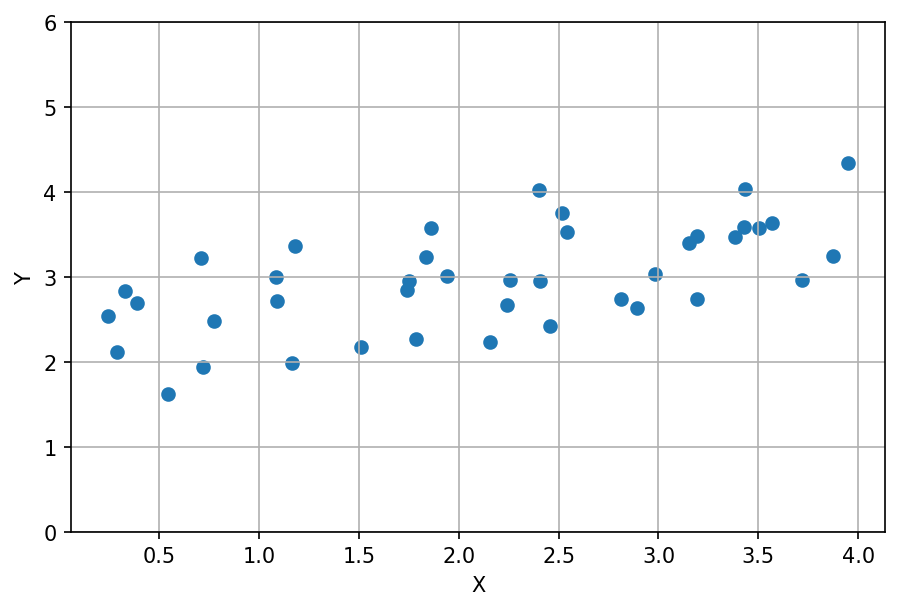

In [4]:
# Data is X and Y coordinates
X = data['X']
Y = data['Y']
plt.scatter(X, Y) # Plot 
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

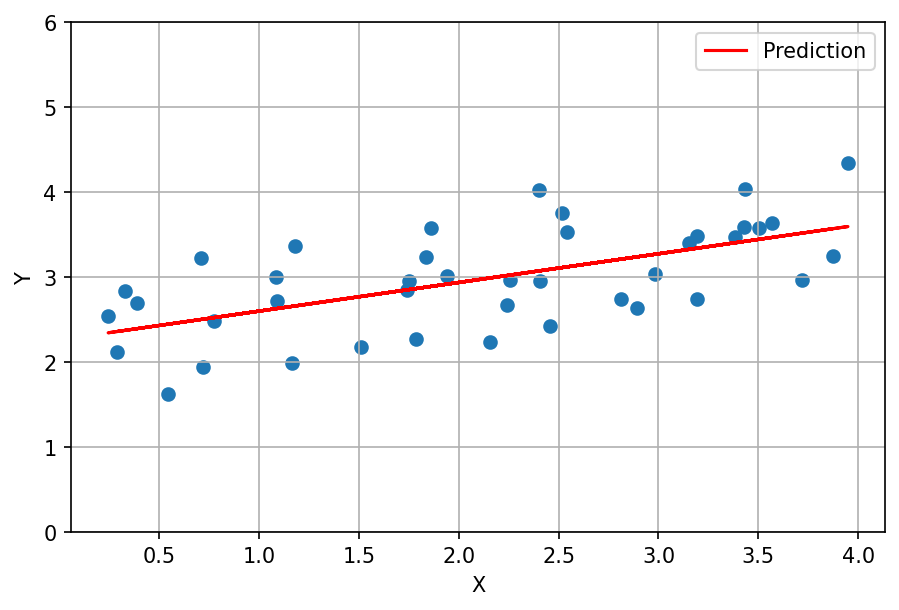

In [5]:
# Use scikitlearn to do linear regression
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()

x=X.values.reshape(-1,1) # LinearRegressor object wants arguments as numpy objects
y=Y.values.reshape(-1,1)
linearRegressor.fit(x, y)
y_pred = linearRegressor.predict(x)
plt.scatter(X, Y) # scatter plot, learning data
plt.plot(x, y_pred, 'red') # plot of linear regression prediction on top (red line)

#Plot formatting.
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.ylim([0,6]);
plt.legend(['Prediction'])

In [6]:
# Just try a single number
linearRegressor.predict([[3]])

array([[3.27684707]])

Root Mean Squared Error:

$MSE\ =\ \frac{1}{n}\sum_{i=1}^{n}\left({\hat{Y}}_i - Y_i\right)^2$

In [7]:
from sklearn.metrics import mean_squared_error # Sklearn library has this as a func for us.
mean_squared_error(y, y_pred)

0.23034812795839643

## Linear Regression Under the Hood

In [8]:
# Maky your own simple linear regression Gradient Descent
eta = 0.05  # Learning Rate 0.01
iterations = 100  # The number of iterations to perform 1e3
n = len(X) # Number of elements 
beta0, beta1 = 0, 0 # start with random numbers

# Performing Gradient Descent
for i in range(iterations): 
    beta0 = beta0 - eta * (2/n) * sum(beta0 + beta1 * X - Y)
    beta1 = beta1 - eta * (2/n) * sum((beta0 + beta1 * X - Y) * X)

print('Final values of Beta0 and Beta1 are:', beta0, beta1)

Y_pred = beta0 + beta1 * X # Do the prediction

Final values of Beta0 and Beta1 are: 2.0228762355020855 0.4283872160417387


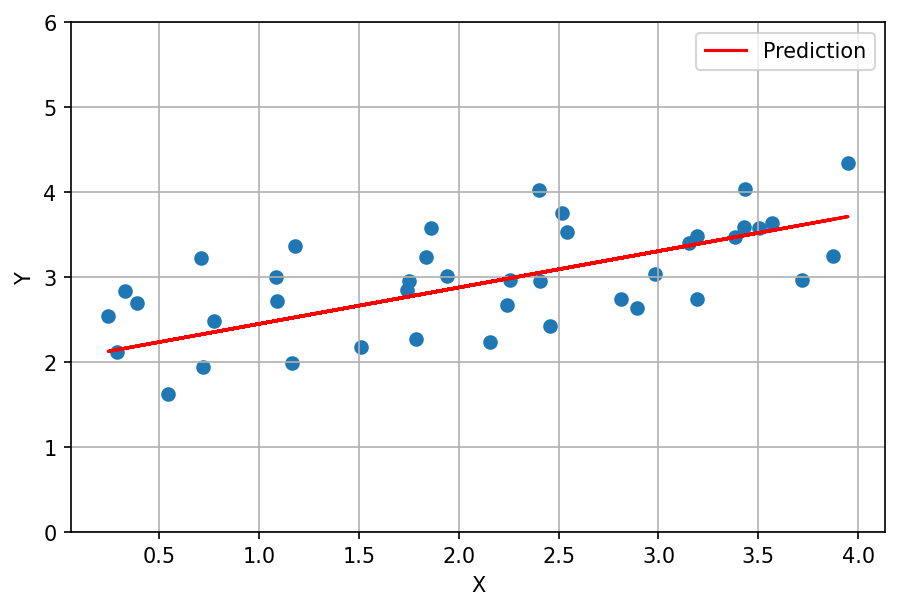

In [9]:
# Plotting
plt.scatter(X, Y) 
plt.plot(X, Y_pred, color='red')

# Formatting
plt.ylim([0,6])
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Prediction'])

In [10]:
mean_squared_error(Y, Y_pred)

0.24271700839794935

# Exercise 9 - Custom Linear Regression with 2 Feature Variables
Here we will take in 2 columns of stock fundamental data, as well as the past stock return, and try and predict returns

Some of the code is missing. Try and fix the code.

In [3]:
data = pd.read_csv('Exercise_10_StockReturnData.csv') # Read in our data
data.head() # Take a first look at the data with head

,Stock Performance,P/E,RoE
0,0.055388,10.875822,0.179792
1,0.112595,18.033607,0.143820
2,0.947340,-11.771037,-0.209845
3,0.032850,12.254908,5.000000
4,-0.015705,20.870461,0.040745


In [49]:
data.describe() # data seems OK

,Stock Performance,P/E,RoE
count,78.000000,78.000000,78.000000
mean,0.166818,27.350574,0.108781
std,0.399712,48.222197,0.865526
min,-0.767647,-179.701327,-5.000000
25%,-0.119285,13.976447,0.041304
50%,0.074066,18.933449,0.105154
75%,0.372113,35.779851,0.198886
max,1.722365,276.261734,5.000000


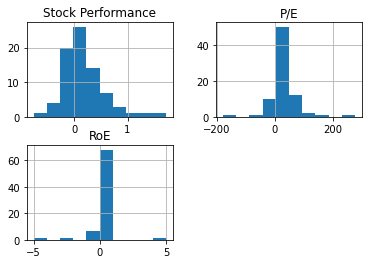

In [51]:
data.hist(); # histograms seem OK

In [52]:
y = data['Stock Performance'] # Split data into X and Y
X = data.drop(columns='Stock Performance')

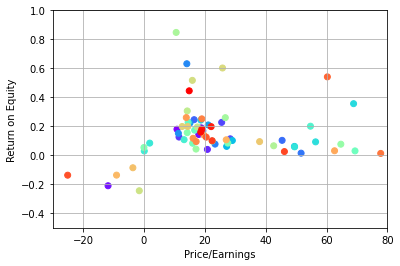

In [58]:
# Plotting scatter plot to see if anything obcious can be seen.
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.scatter(X['P/E'], X['RoE'], color=colors) # Plot
plt.xlabel('Price/Earnings')
plt.ylabel('Return on Equity')
plt.grid()
plt.xlim([-30,80])
plt.ylim([-0.5,1]);
# Nothing easily to identify visually.

In [59]:
from sklearn.model_selection import train_test_split # Want to split test and train data for Machine Learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Simple linear regression Gradient Descent
eta = 0.0002  # Learning Rate 0.0001 seems OK.
iterations = 1000  # The number of iterations to perform, 1000 seems OK.
n = len(X_train) # Number of elements 
beta0, beta1, beta2 = 0, 0, 0 # start with random numbers

# Manually setting X1 and X2. Could put regression into a function if you wish.
X1 = X_train['P/E']
X2 = X_train['RoE']

# Performing Gradient Descent to find Beta values.
for i in range(iterations): 
    beta0 = beta0 - eta * (2/n) * sum(beta0 + beta1*X1 + beta2*X2 - y_train)
    beta1 = beta1 - eta * (2/n) * sum((beta0 + beta1*X1 + beta2*X2 - y_train) * X1)
    beta2 = beta2 - eta * (2/n) * sum((beta0 + beta1*X1 + beta2*X2 - y_train) * X2)

y_pred = beta0 + beta1 * X1 + beta2 * X2 # Do the prediction
print('Final values of Beta0, Beta1 and Beta2 are:', beta0, beta1, beta2) # Make sure not crazy numbers

Final values of Beta0, Beta1 and Beta2 are: 0.06731612955982127 -0.0010626149735552147 0.026364529809858428


Model equation is:

$\hat{y} = \beta_{0}+ \beta_{1}X_{1}+ \beta_{2}X_{2}$

See book formulas for how $\beta_{0}, \beta_{1}, \beta_{2}$ values are found (code above)

In [7]:
from sklearn.metrics import mean_squared_error
print('train error', mean_squared_error(y_train, y_pred))
print('test error', mean_squared_error(y_test, beta0 + beta1 * X_test['P/E'] + beta2 * X_test['RoE']))

train error 0.19071588902705444
test error 0.06700800884430004


In [90]:
def predictReturn(PE=X['P/E'].mean(), 
                  RoE=X['RoE'].mean(), 
                  beta0=beta0, beta1=beta1, beta2=beta2):
    '''
    Prediction from 2 variable linear regression for P/E and RoE predicting stock return.
    Default takes the mean P/E or RoE (return on equity) values.
    Model fitted parameters beta0, beta1, beta2 are needed.
    '''
    stock_return_pred = beta0 + beta1*PE + beta2*RoE
    return stock_return_pred

In [91]:
# The fit seems to work. Let's try a common-sense check to see if the algorithm is working.
# A stock with a ridiculously low P/E with a ridiculously high RoE should give us spectacular returns.
# Try P/E of 2 and a RoE of 100%
stock_return_pred = predictReturn(2, 1)
print('Predicted Stock Return P/E of 2 and RoE of 100% is:\n', 
      round(stock_return_pred*100,2),
      '%')

Predicted Stock Return P/E of 2 and RoE of 100% is:
 9.16 %


In [92]:
# 7% as a prediction kind of sucks, but it is at least positive.
# Try P/E of 100 and a RoE of 10%, this kind of stock should do badly.
stock_return_pred = predictReturn(100, 0.1, beta0, beta1, beta2)
print('Predicted Stock Return P/E of 100 and RoE of 10% is:\n', 
      round(stock_return_pred*100,2),
      '%')

Predicted Stock Return P/E of 100 and RoE of 10% is:
 -3.63 %


In [93]:
'''
2% return is quite low for a stock return.
Bear in mind that we have less than 100 rows of data to work with. 

Our regression algorithm generally predicts things in the right direction, 
we expect a low P/E stock with high Return on Equity to perform better.

Also bear in mind that only beta0, 1 and 2 are changing, 
by their nature they will not capture many relationships in the data.

We'll use learning curves with Scikit-Learn linear regressors next.
''';